In [18]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
data = pd.read_csv("data/creditcard.csv")#,na_values={'TotalCharges': ' '})
#data

In [20]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [21]:
data.isnull().sum() 
# NO missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
data.drop(columns='Time',inplace=True)
# The time column is irrelivant for classification
#data

In [23]:
# all negative samples
data_neg = data[data['Class'] == 0]
print('Unique Values in Class of neg ',data_neg['Class'].unique())
print('Neg Rows = ',len(data_neg.index))

Unique Values in Class of neg  [0]
Neg Rows =  284315


In [24]:
# all positive samples
data_pos = data[data['Class'] == 1]
print('Unique Values in Class of pos ',data_pos['Class'].unique())
print('Pos Rows = ',len(data_pos.index))

Unique Values in Class of pos  [1]
Pos Rows =  492


In [25]:
# sample 20000 negative samples
data_neg = data_neg.sample(n = 20000,replace=False,random_state=1505064)
#data_neg

In [26]:
final_data = pd.concat([data_neg,data_pos],ignore_index=True)
#final_data

In [27]:
# bin the continuous data 

# Freedman–Diaconis' choice to calculate bin size
# choose this because less sensitive than the standard deviation to outliers in data 
def freedman_diaconis_rule(data,n):
    min_x = data.min()
    max_x = data.max()
    q1    = data.quantile(.25)
    q3    = data.quantile(.75)
    IQR   = q3 - q1
    h     = 2*IQR*np.power(n,-1/3)
    n_bins = np.ceil((max_x - min_x)/h)
    return n_bins

In [28]:
# the colums with continuous values
cont_cols = final_data.columns[:-1]

# number of samples for each colums
n = len(final_data.index)

In [29]:
# compare distribution
# before
#for col in cont_cols:
#final_data['V1'].plot.kde()

In [30]:
for col in cont_cols:
    # get the number of bins
    n_bins = freedman_diaconis_rule(final_data[col],n)
    
    # cur into bins and replace columns
    final_data[col] = pd.cut(final_data[col],bins=n_bins,labels=False)
    
    # see if the binning creates finite catagories
    #print(len(final_data[col].unique()))

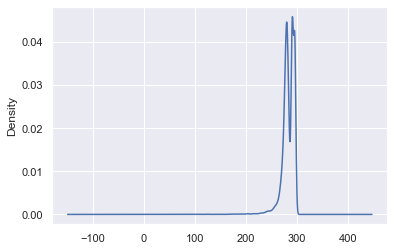

In [31]:
# compare distribution
# after
#for col in cont_cols:
final_data['V1'].plot.kde()
# similar after binning

In [32]:
final_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,291,443,217,51,230,144,528,1016,144,339,...,741,120,1204,56,164,38,778,652,1,0
1,276,451,220,24,236,150,537,1011,164,367,...,719,107,1196,33,151,61,755,564,0,0
2,290,426,220,36,214,152,512,1026,144,349,...,749,123,1195,48,159,43,775,652,25,0
3,276,447,218,49,230,149,535,1026,138,336,...,742,121,1221,50,147,37,771,650,18,0
4,296,439,205,43,233,138,529,1011,152,338,...,746,126,1209,69,158,33,775,645,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20487,272,450,183,56,215,128,516,1037,123,263,...,761,109,1234,43,162,64,798,664,72,1
20488,292,451,179,53,237,136,510,1026,133,295,...,748,113,1200,47,162,63,806,668,0,1
20489,280,450,198,45,220,151,500,1050,138,292,...,761,123,1215,49,136,56,806,669,14,1
20490,265,445,177,56,223,117,500,1046,128,267,...,755,109,1186,45,145,59,846,624,45,1


In [33]:
final_data.to_csv('data/creditcard_proc.csv',index=False)